## System Benchmarking Tool for Decentralized Energy Trading


### Imports

In [7]:
%%capture
import sys
import json
import os
import matplotlib.pyplot as plt
import math
import numpy as np
!{sys.executable} -m pip intall web3
!{sys.executable} -m pip install matplotlib



### Configuration
- n - max. number of households to be benchmarked
- shareProducers - share of producing households


In [8]:
n = 5
shareProducers = 0.15


### Generate Contracts

In [ ]:
witness_time = []
proof_time = []
gas = []
%alias_magic benchmark timeit -p "-n 1 -r 1 -o"

def calcProducerConsumer(num):
    if math.ceil(num * shareProducers) > 1:
        wE = num * shareProducers
        nE = n - wE
    else:
        wE = 1
        nE = num - wE
    return wE, nE

# counts constraints by looking into out.ztf
def count_constraints():
    f = open("./out.ztf",'r')
    constraints.append(len(list(filter(lambda x: "==" in x, f.readlines()))))
    
def compile_file(file):
    value = %benchmark !zokrates compile -i settlement-check.zok --light
    return int(value.best * 1000000)

def setup():
    value = %benchmark !zokrates setup --light
    return int(value.best * 1000000)

def parseData():
    !pwd
    with open('tmp/zokrates_exec_time.json') as json_file:
        data = json.load(json_file)
        witness_time.append(data[0])
        proof_time.append(data[1])
    gasFile = open("tmp/gas.txt", "r")
    gas.append(gasFile.read())
    print(gas)
    print(proof_time)
    print(witness_time)

%cd ..
for i in range(2, n + 1):
    wE, nE = calcProducerConsumer(i)
    %cd zokrates-code
    !node zoKratesCodeGenerator.js {wE} {nE}
    !zokrates compile -i settlement-check.zok --light
    !zokrates setup --light
    !zokrates export-verifier
    !cp ./verifier.sol ../contracts/verifier.sol
    %cd ..
    print("Compiling and deploying Contracts...")
    !!truffle migrate --reset hard --network benchmark
    !node benchmark/setup_benchmark.js {wE} {nE}
    parseData()
%cd benchmark

Created `%benchmark` as an alias for `%timeit -n 1 -r 1 -o`.
Created `%%benchmark` as an alias for `%%timeit -n 1 -r 1 -o`.
/Users/paul/Documents/projects/decentralized-energy-trading
/Users/paul/Documents/projects/decentralized-energy-trading/zokrates-code
Wrong or no network provided...Default network: authority
# of HHs with Energy:  1
# of HHs without Energy:  1
Generating zoKrates-Code for n = 1 HHs with Energy & m = 1 HHs without Energy and saving it to a file...
Generating the corresponding code for the Configuration of the NED-Server...
Saving the generated code to the ned-server-config.js File...
Generating the corresponding Solidity Contracts...
Saving the generated code to the corresponding Solidity-Contract Files...
Saving the generated code to the ned-server-config.js File...
Done!
Compiling settlement-check.zok

Compiled code written to 'out'
Number of constraints: 118557
Performing setup...
Has generated 114349 points
Exporting verifier...
Finished exporting verifier.
/U

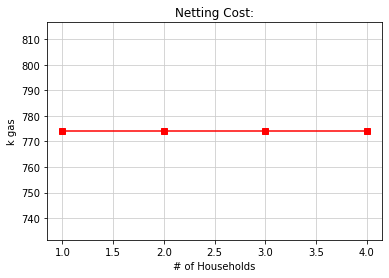

In [10]:
ax = plt.plot(list(range(1, len(gas) + 1)), [float(x) / 1000 for x in gas], '-rs')
plt.title('Netting Cost:')
plt.xlabel('# of Households')
plt.ylabel('k gas')
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "#cccccc"
plt.savefig('exports/gas.png')

%cd zokrates-code
!node zoKratesCodeGenerator.js {wE} {nE}

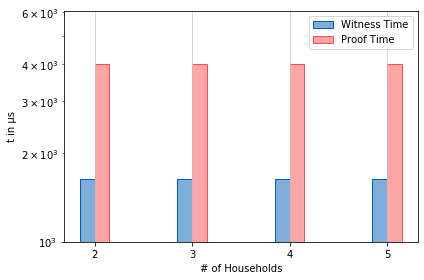

In [14]:
x = np.arange(n - 1)  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, witness_time, width, label='Witness Time', edgecolor='#005eb8', color='#7faedb')
rects2 = ax.bar(x + width/2, proof_time, width, label='Proof Time', edgecolor='#ff4c4c', color='#ffa5a5')
ax.set_ylabel('t in μs')
ax.set_xticks(x)
ax.set_xlabel('# of Households')
ax.set_xticklabels(range(2, n + 1))
ax.legend()
ax.semilogy(np.exp(0 / max(proof_time)))
ax.set_ylim(ymin=1000)
fig.tight_layout()
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = "#cccccc"
plt.savefig('exports/compile-setup.png')
plt.show()